### ML Part 0: Introduction to Image analysis and Pytorch

In our machine learning assignment, we will be building a model that analyzes image data. We will familiarize ourselves with this data type in this jupyter notebook. 

In [1]:
## Importing packages 
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
import torchvision

#### Importing images and applying a transformation:

In [2]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
#specifying image transformation(s) - we are converting the image to a tensor which can be used by tensorflow
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
           )


#### Using python indexing, "look" at one of the images. What does is outputted? How is your image stored in all_images?

In [34]:
all_images[0][0] # (image, label)
# image converted to a tensor, so image stored as numbers not pixels, each value is pixel intensity

tensor([[[0.3006, 0.2936, 0.2936,  ..., 0.3286, 0.3251, 0.3286],
         [0.2307, 0.2377, 0.2307,  ..., 0.2866, 0.2901, 0.2936],
         [0.1818, 0.1992, 0.1748,  ..., 0.2517, 0.2831, 0.2866],
         ...,
         [0.1119, 0.1014, 0.1014,  ..., 0.1992, 0.1783, 0.1783],
         [0.0664, 0.0594, 0.0594,  ..., 0.1468, 0.1188, 0.1188],
         [0.0839, 0.0804, 0.0804,  ..., 0.1748, 0.1468, 0.1433]],

        [[0.3845, 0.3810, 0.3810,  ..., 0.4194, 0.4090, 0.4125],
         [0.2936, 0.3006, 0.2971,  ..., 0.3705, 0.3670, 0.3705],
         [0.1906, 0.2080, 0.1922,  ..., 0.3286, 0.3460, 0.3425],
         ...,
         [0.1433, 0.1328, 0.1363,  ..., 0.2656, 0.2482, 0.2482],
         [0.0944, 0.0874, 0.0874,  ..., 0.1957, 0.1713, 0.1713],
         [0.1084, 0.1049, 0.1049,  ..., 0.2202, 0.1888, 0.1853]],

        [[0.3839, 0.3752, 0.3752,  ..., 0.3979, 0.3909, 0.3944],
         [0.2932, 0.3002, 0.2949,  ..., 0.3525, 0.3525, 0.3560],
         [0.1922, 0.2097, 0.1869,  ..., 0.3141, 0.3456, 0.

#### Using python indexing, what size is the image?

In [33]:
all_images[0][0].shape # or .numpy().shape
# RGB channels, height, width
# pytorch is an open-source ML framwork

torch.Size([3, 630, 2274])

#### Look through the dataset, are all of the pictures the same size?

In [16]:
img_size = {all_images[i][0].shape for i in range(5)} # set so keeps unique values
print(img_size)

{torch.Size([3, 630, 2274]), torch.Size([3, 127, 389]), torch.Size([3, 704, 2168]), torch.Size([3, 584, 2073]), torch.Size([3, 324, 1550])}


I only looked at 5 tensor images but they are not the same size. The heights and widths vary greatly.

#### Using matplotlib, "look" at the same image. How is this similar/different from our python indexing approach?

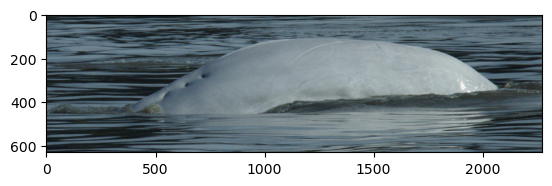

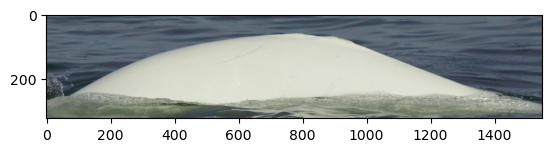

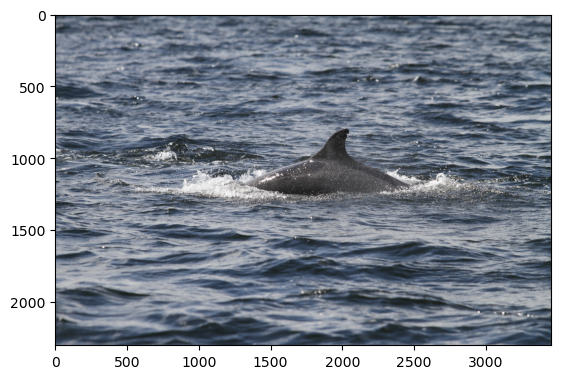

In [28]:
plt.imshow(all_images[0][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[1][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[1000][0].permute(1,2,0))
plt.show()

Python indexing will show the dimensions as (C,H,W) whereas matplotlib displays them in (H,W,C) order. So we need to specify the order we want the information displayed in. It also showed the actual image! Woah. 
So, with indexing we are able to inspect the data structure, but with matplotlib we can *visualize* the data by converting it into an image.


#### Apply a new transformation to the data that changes the color of the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [82]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.ColorJitter(contrast=2.0, brightness=0.5,hue=0.3)])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               ColorJitter(brightness=(0.5, 1.5), contrast=(0.0, 3.0), saturation=None, hue=(-0.3, 0.3))
           )


#### View the same image from above with BOTH python indexing and matplotlib

In [75]:
all_images[0][0]

tensor([[[0.3675, 0.3563, 0.3563,  ..., 0.3788, 0.3750, 0.3787],
         [0.2812, 0.2887, 0.2813,  ..., 0.3339, 0.3375, 0.3412],
         [0.2019, 0.2206, 0.1908,  ..., 0.2964, 0.3373, 0.3334],
         ...,
         [0.1196, 0.1084, 0.1164,  ..., 0.2364, 0.2103, 0.2103],
         [0.0826, 0.0752, 0.0752,  ..., 0.1764, 0.1428, 0.1428],
         [0.1013, 0.0975, 0.0975,  ..., 0.2100, 0.1651, 0.1613]],

        [[0.3213, 0.3139, 0.3139,  ..., 0.3512, 0.3475, 0.3512],
         [0.2466, 0.2541, 0.2466,  ..., 0.3064, 0.3101, 0.3139],
         [0.1943, 0.2130, 0.1868,  ..., 0.2690, 0.3027, 0.3064],
         ...,
         [0.1228, 0.1116, 0.1084,  ..., 0.2130, 0.1906, 0.1906],
         [0.0710, 0.0635, 0.0635,  ..., 0.1569, 0.1270, 0.1270],
         [0.0897, 0.0859, 0.0859,  ..., 0.1868, 0.1569, 0.1532]],

        [[0.4110, 0.4073, 0.4073,  ..., 0.4484, 0.4372, 0.4409],
         [0.3139, 0.3213, 0.3176,  ..., 0.3961, 0.3923, 0.3961],
         [0.2055, 0.2242, 0.2055,  ..., 0.3512, 0.3699, 0.

In [76]:
all_images[0][0].numpy().shape

(3, 630, 2274)

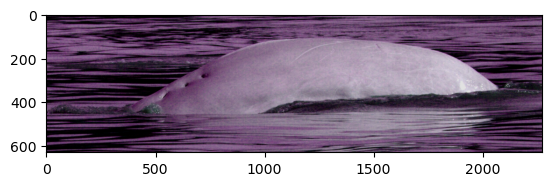

In [83]:
plt.imshow(all_images[0][0].permute(1,2,0))
plt.show()

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

The values changed for the image, but the image size did not change. I changed the contrast, brightness, and huge for the image so now instead of blue, grey, and white colors it looks purple and grey. The image's appearance changed but its structure did not, so there's still the same height, width, and number of channels.

#### Apply a transformation to the data that crops the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [95]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(450)])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               CenterCrop(size=(450, 450))
           )


#### View the same image from above with BOTH python indexing and matplotlib

In [96]:
all_images[0][0]

tensor([[[0.1647, 0.1490, 0.1294,  ..., 0.3882, 0.4000, 0.4039],
         [0.1608, 0.1647, 0.1294,  ..., 0.3765, 0.3765, 0.4078],
         [0.1490, 0.1412, 0.1294,  ..., 0.3725, 0.3922, 0.3961],
         ...,
         [0.4275, 0.4039, 0.3843,  ..., 0.4667, 0.4549, 0.4392],
         [0.3725, 0.3686, 0.3922,  ..., 0.4392, 0.4471, 0.4431],
         [0.3765, 0.3922, 0.4314,  ..., 0.4314, 0.4431, 0.4431]],

        [[0.1961, 0.1882, 0.1608,  ..., 0.4627, 0.4745, 0.4902],
         [0.1882, 0.2000, 0.1569,  ..., 0.4471, 0.4471, 0.4863],
         [0.1765, 0.1765, 0.1569,  ..., 0.4392, 0.4588, 0.4706],
         ...,
         [0.5020, 0.4706, 0.4510,  ..., 0.5059, 0.5059, 0.4902],
         [0.4510, 0.4431, 0.4667,  ..., 0.4784, 0.4980, 0.4941],
         [0.4588, 0.4745, 0.5059,  ..., 0.4706, 0.4941, 0.4941]],

        [[0.2078, 0.1922, 0.1686,  ..., 0.5216, 0.5294, 0.5412],
         [0.2196, 0.2275, 0.1804,  ..., 0.4941, 0.4941, 0.5216],
         [0.2392, 0.2353, 0.2196,  ..., 0.4706, 0.4902, 0.

In [97]:
all_images[0][0].numpy().shape

(3, 450, 450)

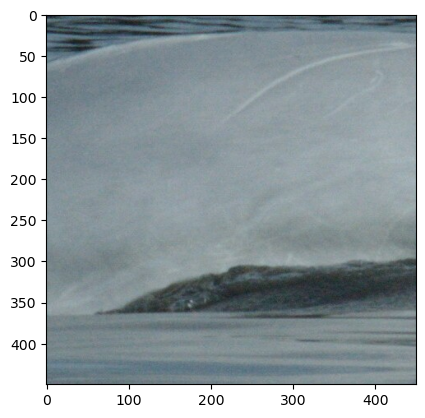

In [98]:
plt.imshow(all_images[0][0].permute(1,2,0))
plt.show()

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

The values changed, yes, as did the tensor/image size since pixels were removed. It went from (3, 630, 2274) to (3, 450, 450). The height and width now correspond to the single value I put in (450). The image is now cropped to the center 450 pixels of the image, so it's giving the appearance of being zoomed in.

#### Look through the dataset, are all of the pictures the same size?

In [99]:
img_size = {all_images[i][0].shape for i in range(5)} # set so keeps unique values
print(img_size)

{torch.Size([3, 450, 450])}


Yes, all the images are the same size now because we applied the transformation to all the images.

#### Determine an image transformation approach that would give you optimal input images for a machine learning whale species classifier

You want: 
- All images converted to numerics
- All images to be the same size
- A data normalization approach
- Data augmentation

Make sure you visualize a few images to make sure your chosen approach was successful!

I would want to transform the pictures in a way that improves contrast, brightness, and/or maybe saturation. Cropping the image slightly so that there's less ocean or background and more focus on the whale might also be beneficial, but I don't want to overcrop and lose important features.

In [108]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((450,450)),
                                transforms.ColorJitter(brightness=0.2, saturation=0.3)
                               ])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(450, 450), interpolation=bilinear, max_size=None, antialias=True)
               ColorJitter(brightness=(0.8, 1.2), contrast=None, saturation=(0.7, 1.3), hue=None)
           )


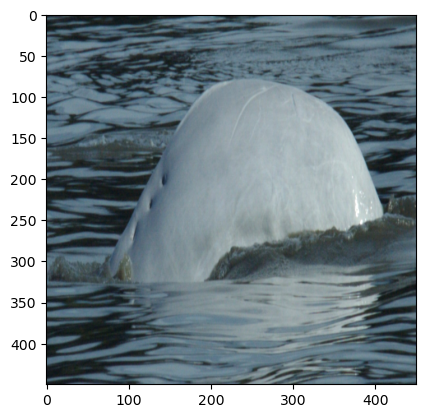

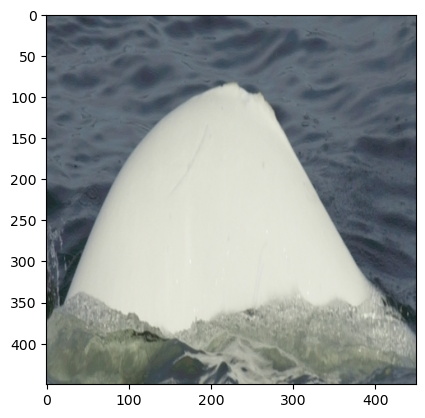

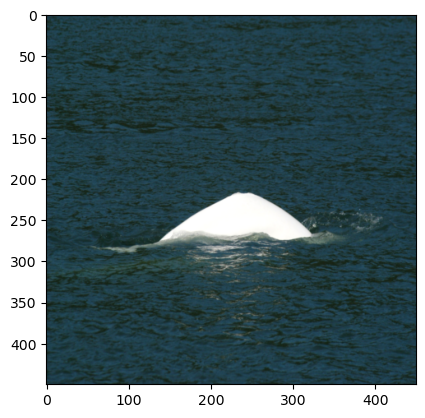

In [109]:
plt.imshow(all_images[0][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[1][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[500][0].permute(1,2,0))
plt.show()

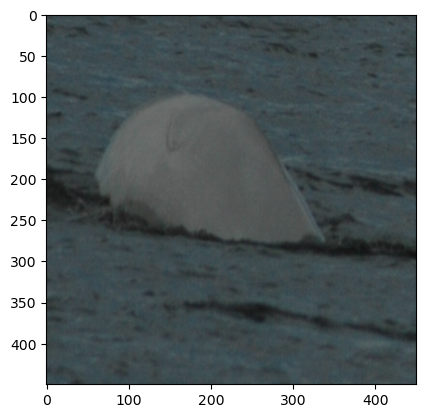

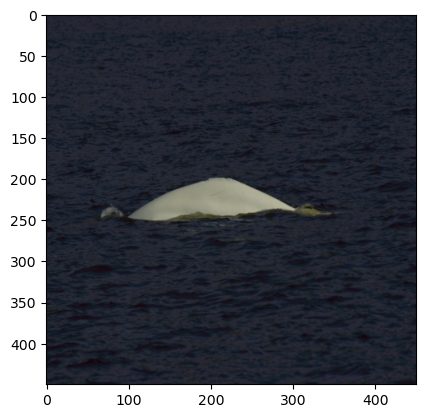

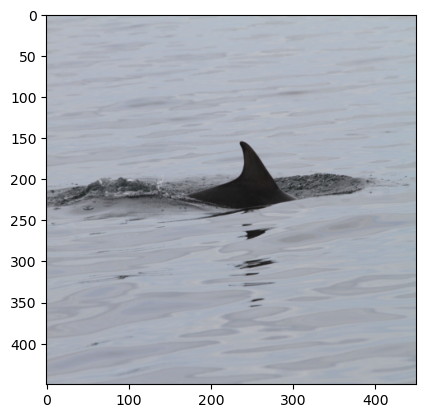

In [110]:
plt.imshow(all_images[12][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[32][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[2026][0].permute(1,2,0))
plt.show()

In [140]:
# needed to normalize data (just did a generic normalization for learning purposes), made photos look really dark so tried to play with brightness
# but maybe darker photos is good depending on species? white stands out more??
# better to try mean and std for normalization?
# read something about imagenet...pretrained model values
transform = transforms.Compose([
    transforms.Resize((450,450)), # same size
    transforms.ColorJitter(brightness=0.3), # augmentation
    transforms.ToTensor(), # numerics
    transforms.Normalize([0.5]*3, [0.5]*3) # normalization
])
all_images = datasets.ImageFolder(images, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..1.0].


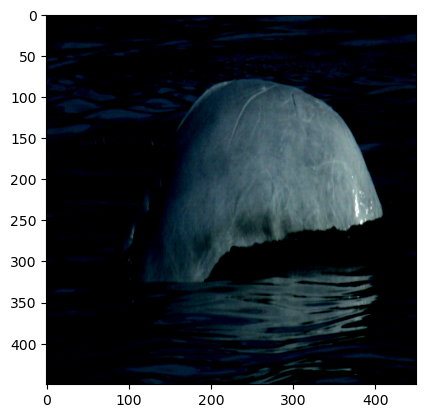

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81960785..1.0].


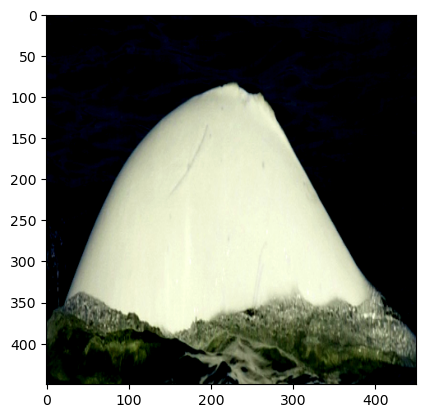

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.90588236..0.7019608].


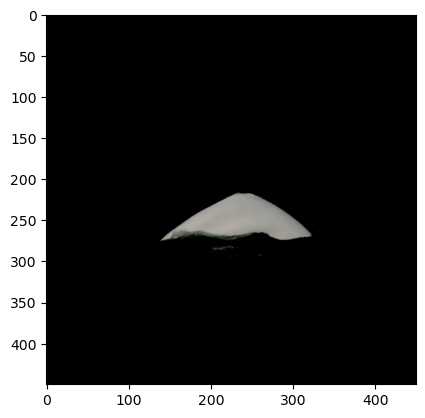

In [141]:
plt.imshow(all_images[0][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[1][0].permute(1,2,0))
plt.show()
plt.imshow(all_images[500][0].permute(1,2,0))
plt.show()